# Machine Learning Foundation

## Course 6, Part c: Stationarity DEMO

# Introduction

In Lesson 1, *An Introduction to Time Series*, we learned that time series data is data that is measured at equally-spaced intervals. We also learned that time series data can be decomposed into three parts: trend, seasonality, and residuals. 

Now we'll dig deeper by discussing an important concept called **stationarity**. Having a firm grasp of this concept will lay the foundation necessary to understand more advanced modeling strategies that we'll introduce in subsequent lessons. Spend the time to really understand this material.

# Learning Outcomes
You should walk away from this demonstration with:
1. A practical understanding of what it means for time series to be stationary.
2. A better understanding of ways to identify stationarity.
3. Several common ways to transform nonstationary time series data.

# Imports

In [1]:
import sys, os
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)


---

# Section 1: Stationary Time Series

In this lesson, we will explore stationary time series. Specifically, we'll discuss what it means for time series to be stationary and show examples of a few time series that are not stationary.

As before, we'll generate datasets from scratch to help you establish a deeper understanding of what it means for time series data to be stationary or nonstationary. 

### What is Stationarity?
In order for time series data to be stationary, the data must exhibit four properties over time:
1. constant mean
2. constant variance
3. constant autocorrelation structure
4. no periodic component

Mean, variance, and periodic component (aka seasonality) should be familiar to you. Autocorrelation may not be. Autocorrelation simply means that the current time series measurement is correlated with a past measurement. For example, today's stock price is often highly correlated with yesterday's price. 

To discuss these things simply we must introduce the idea of a **lag**. Suppose you wanted to know if today's stock price correlated better with yesterday's price or the price from two days ago. You could test this by computing the correlation between the original time series and the same series delayed one time interval. Therefore, the second value of the original time series would be compared with the first of the delayed. The third original value would be compared with the second of the delayed. And so on. Performing this process for a lag of 1 and a lag of 2, respectively, would yield two correlation outputs. This output would tell you which lag is more correlated. That is **autocorrelation** in a nutshell. 

Let's apply what we've learned now that we nailed down terminology.

We'll begin by creating a variable called **time** that will define equally-spaced time intervals. Then we'll sample values from a Normal distribution with mean 0 and a standard deviation of 1. Essentially we're creating noise, which is a stationary time series. In other words, the series of data exhibits all four proporties required of a stationary time series.

In [2]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

It makes sense to generate a run-sequence plot to visually confirm stationarity. 
> We'll create a *run_sequence_plot* function to make plotting throughout this tutorial less cumbersome.

In [3]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

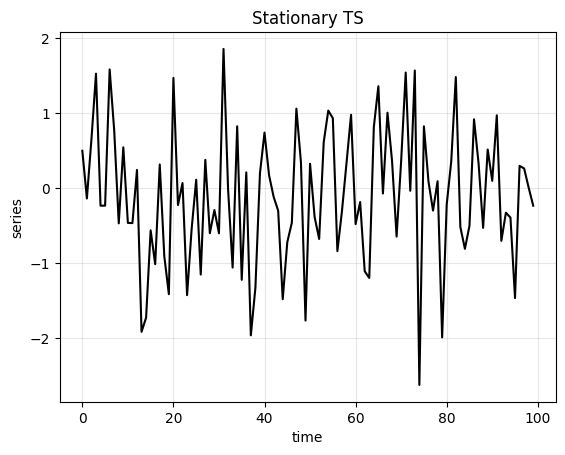

In [4]:
run_sequence_plot(time, stationary, 
                  title="Stationary TS")

Notice in the plot above how there's no clear trend or seasonality. This time series data appears to be meet the four conditions of stationarity: constant mean, constant variance, constant autocorrelation, and no periodic component. 

Let's look at one more example, a concrete example of data with a lag of one that has constant autocorrelation.

### Autocorrelation Structure

In [5]:
# seed to start series
seed = 3.14

# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]

/tmp/ipykernel_20308/1158137762.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)


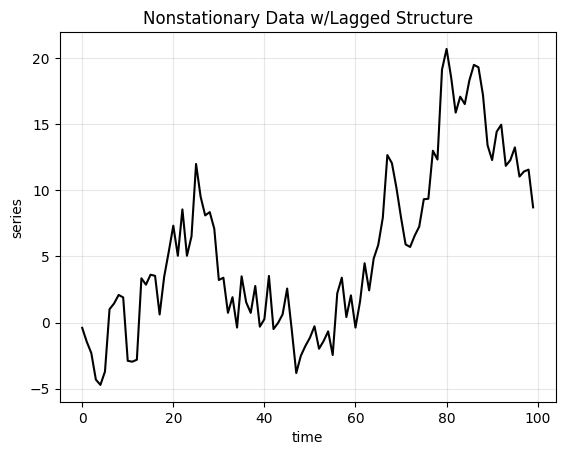

In [6]:
run_sequence_plot(time, lagged,
                  title="Nonstationary Data w/Lagged Structure")

Notice how the current value is highly correlated with the past value?

At this point you're probably wondering how to check if a time series in fact meets the four conditions of stationarity. We'll learn in Section #2 how to check that. However, starting your analysis with a run-sequence plot is an effective way to get a handle on whether your data has the appearance of being stationary. 

To drive that point home, let's discuss some ways to generate nonstationary time series:
1. **Trend** (changing mean)
2. **Heteroscedasticity** (changing variance)
3. **Seasonality** (periodic component)
4. **Trend + Seasonality**

Naturally, we'll plot the results of each so we can compare nonstationary to stationary data. 

---

#### Trend

In [7]:
trend = (time * 2.75) + stationary

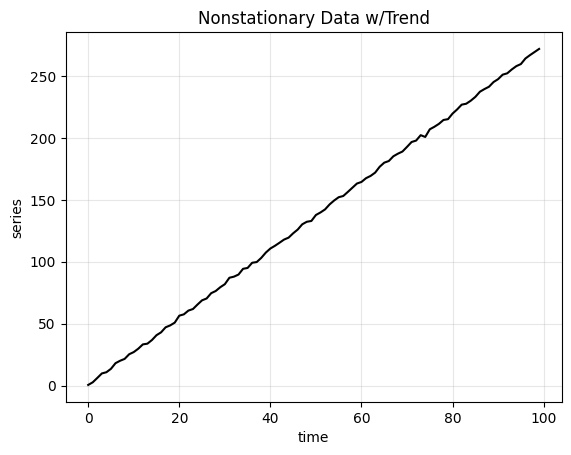

In [8]:
run_sequence_plot(time, trend,
                  title="Nonstationary Data w/Trend")

**Question:** Why is this data not stationary?

**Answer:** The mean changes over time.

---

#### Heteroscedasticity

In [9]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)

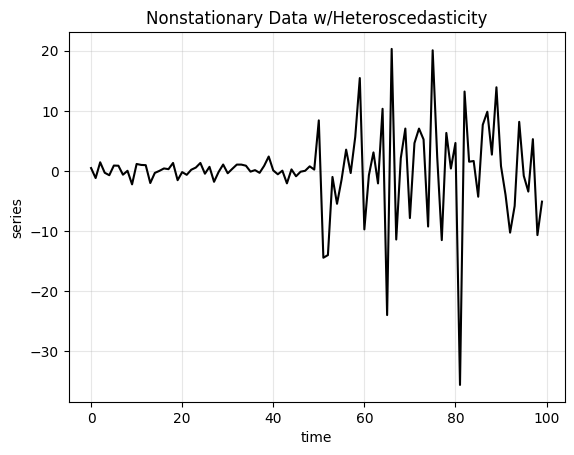

In [10]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

**Question:** Why is this data not stationary?

**Answer:** The variance changes over time.

---

#### Seasonality

In [11]:
seasonality = 10 + np.sin(time) * 10

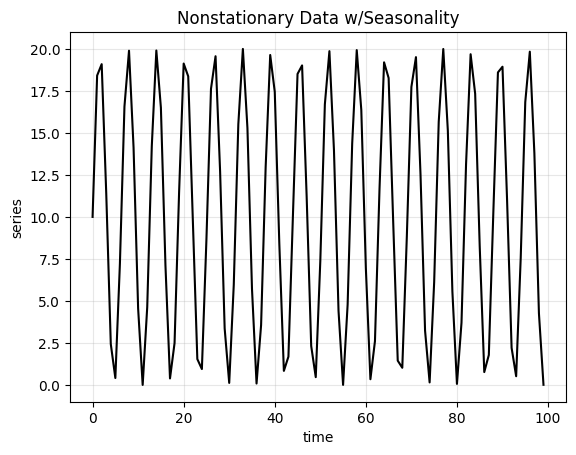

In [12]:
run_sequence_plot(time, seasonality,
                  title="Nonstationary Data w/Seasonality")

**Question:** Why is this data not stationary?

**Answer:** There is a periodic component.

---

#### Trend + Seasonality

In [13]:
trend_seasonality = trend + seasonality + stationary

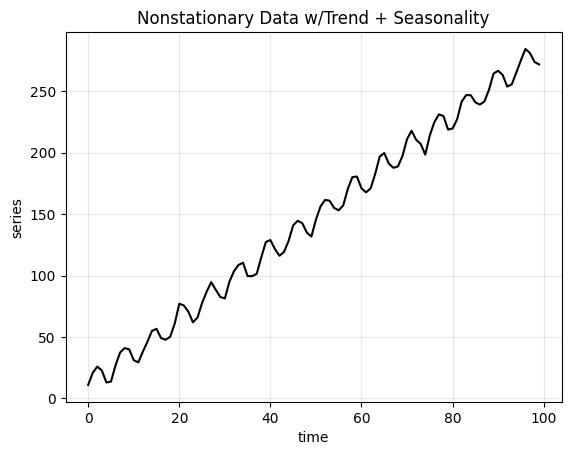

In [14]:
run_sequence_plot(time, trend_seasonality,
                  title="Nonstationary Data w/Trend + Seasonality")

**Question:** Why is this data not stationary?

**Answer:** The mean changes over time AND there is a periodic component.

---

### Exercise #1
In this exercise, your task is to:
1. Create a time variable called **mytime** that is componed of the integers from 0 to 99 inclusive.  
2. Read in **dataset_SNS_1.npy** and **dataset_SNS_2.npy** as **dataset_SNS_1** and **dataset_SNS_2**, respectively. 
3. Plot each time series dataset.
4. Start thinking about whether each is stationary or nonstationary. 

In [15]:
# create time variable
mytime = np.arange(100)

In [16]:
# get data
path_to_file = "./"
dataset_SNS_1 = np.load(path_to_file + "dataset_SNS_1.npy")
dataset_SNS_2 = np.load(path_to_file + "dataset_SNS_2.npy")

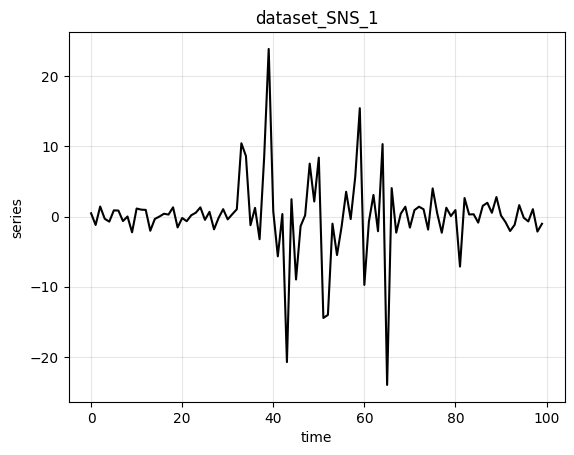

In [17]:
# plot dataset_SNS_1
run_sequence_plot(mytime, dataset_SNS_1, title="dataset_SNS_1")

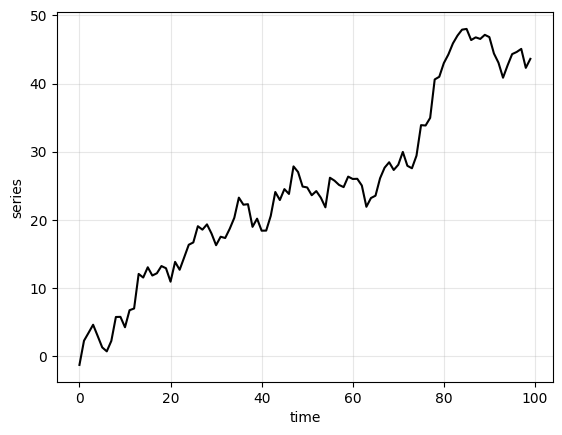

In [18]:
# plot dataset_SNS_2
run_sequence_plot(mytime, dataset_SNS_2, title="")

#### Your Preliminary Thoughts
Are both datasets stationary or is one stationary and one nonstationary or are both nonstationary? 

**dataset_SNS_1** has heteroscedasticity (non-constant variance). We can see three distinct regions of variance - a small one for the first 33 values, a large one for the next 33, and a medium variance for the remaining 34.

**dataset_SNS_2** has a changing mean (trend/autocorrelation) which is clearly not stationary.

---

# Section 2: Identifying Stationarity

In this lesson, we will identify common techniques used to identify if a time series is stationary or not. 

Specifically, we will cover:
1. Run-sequence plots
2. Summary statistics & histogram plots
3. Augmented Dickey-Fuller test

### Run-Sequence Plots
Run-sequence plots should be old hat by now. They are the go-to technique to visualize what's happening with your data. You should always start here. Don't bother building a model until you've done this.

In order to be thorough, let's plot the nonstationary data from above that has trend and seasonality components.

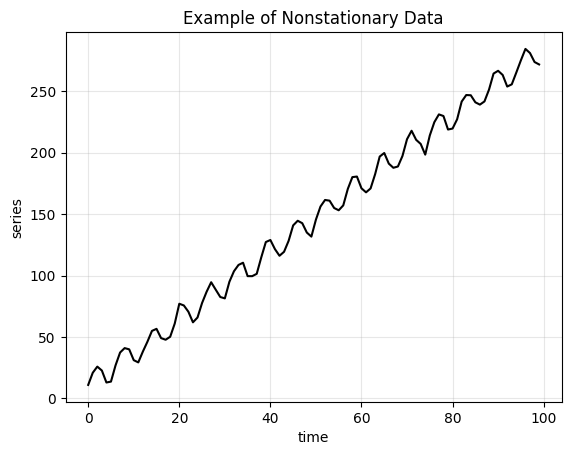

In [19]:
run_sequence_plot(time, trend_seasonality,
                  title="Example of Nonstationary Data")

### Summary Statistics & Plots

Perhaps the easiest way to check for constant mean and variance is to chop up the data into separate chunks, calculate statistics for each chunk, and compare. It's not the most rigorous method but it gives you a good sense of whether your data is approximately stationary.

Let's look at an example using the *trend* data we created in the last section.

In [20]:
# split data into 10 chunks
chunks = np.split(trend, indices_or_sections=10)

In [21]:
chunks[0]

array([ 0.49671415,  2.6117357 ,  6.14768854,  9.77302986, 10.76584663,
       13.51586304, 18.07921282, 20.01743473, 21.53052561, 25.29256004])

#### Summary Stats

In [22]:
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


#### Tangent
There's a nice shortcut method in NumPy to get the same results without having to run through a for loop. 

In [23]:
np.mean(chunks, axis=1)

array([ 12.82306111,  39.08434177,  67.15315644,  94.56489333,
       122.12217783, 150.07444143, 177.35994301, 204.82726388,
       232.47644743, 259.72580861])

In [24]:
np.var(chunks, axis=1)

array([62.54798758, 60.86616531, 58.74556884, 57.2320973 , 58.9505395 ,
       65.11109596, 67.70905522, 54.81013753, 62.67659981, 61.642402  ])

Notice how the values in each array perfectly matches the values in the for loop above? 

#### Explanation

While the variance is relatively constant over time, the mean is clearly changing which means this data is not stationary. 

> Note: We do expect some fluctuation in values. It's highly unlikely that the either the mean or variace will be exactly the same from chunk to chunk, but it should be close. 

If you wanted to get even more sophisticated, you could run a statistical test to determine if the difference in means or the difference in variances is statistically significant. That is beyond the scope of this tutorial, however.

Another useful tool is to plot the means and variances.

#### Histogram Plot

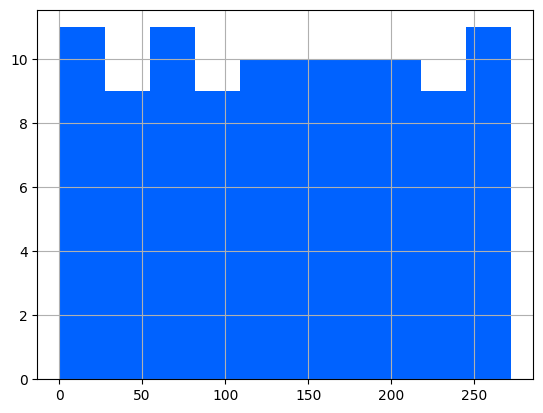

In [25]:
pd.Series(trend).hist();

Plotting a histogram of the time series gives important clues into its underlying structure. A Normal distribution gives confidence that mean and variance are constant. It's certainly not definitive but gives you a good indication. 

Here we see what appears to be a uniform distribution. As we would expect for time series with trend, this data is not stationary and the histogram plot provides insight into that fact.

Let's try the same thing on the *stationary* data we created way back at the beginning. 

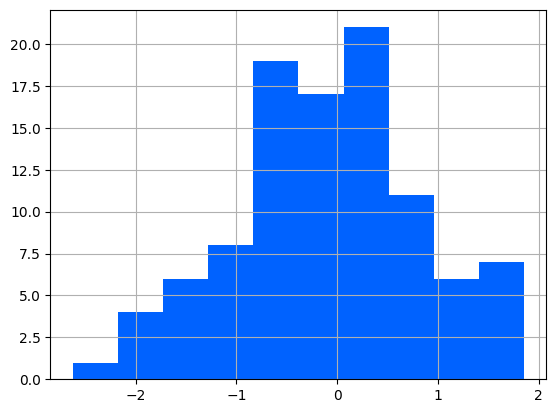

In [26]:
pd.Series(stationary).hist();

That definitely looks more approximately Normal. 

While again out of scope, we could use SciPy's [normaltest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html) to check whether this sample differs from a Normal distribution.

### Augmented Dickey-Fuller Test
This is a statistical procedure to suss out whether a time series is stationary or not. We won't go into all the nitty gritty details but here's what you need to know:
1. **Null hypothesis:** the series is nonstationary.
2. **Alternative hypothesis:** the series is stationary.

Like any statistical test you should set a significance level or threshold that determines whether you should accept or reject the null. 
> The value 0.05 is common but depends upons numerous factors.

Let's see how to run this test in Python.

#### Stationary Data & ADF

In [27]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary)

A brief discussion about the important outputs from the ADF test is in order. 

In [28]:
print(adf)

-10.084425913669714


First, **adf** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -10. That may not mean anything to you just yet but the **pvalue** should.

In [29]:
print(pvalue)

1.1655044784188669e-17


Next, **pvalue** is interpreted like any p-value. Once we set a threshold, we can compare this p-value to that threshold. Either we reject or fail to reject the null. Here **pvalue** is very close to zero (~$10^{-17}$) so we reject the null that this data is nonstationary.

In [30]:
print(nobs)

99


The variable **nobs** is simply the number of observations in the time series, in this case 99.

In [31]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


Finally, the **critical_values** variable provides test statistic threholds for common significant levels. Here we see a test statistic of roughly -2.89 and lower is sufficient to reject the null using a significance level of 5%.

> You may have noticed two outputs we didn't discuss. See [statsmodels docs](http://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) for a description of **usedlag** and **icbest**.

#### Trend Data & ADF
Now to run the ADF test on the *trend* data. 

In [32]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(trend, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  0.33188731231643376
p-value: 0.9787610787258313


#### Lagged Data & ADF
As expected, we fail to reject the null that the trend data is in fact nonstationary. Success!

Let's run the same test on the *lagged* data.

In [33]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(lagged, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  -1.8975904890519297
p-value: 0.33319546838684744


You may find this a surprising result as ADF says the series is nonstationary. Even though the series does have constant autocorrelation, it is not yet in a form that is techincally statinoary. Therefore, we'll learn in the next section how to apply said transformation to accomplish just that.

#### The Good News 
You now have several tools in your toolkit to help you figure out if a given time series is stationary or not.

---

### Exercise #2
Think back to the two datasets from Exercise #1. You should have the tools to answer whether each is stationary or not. Provide your answers and explanations below.

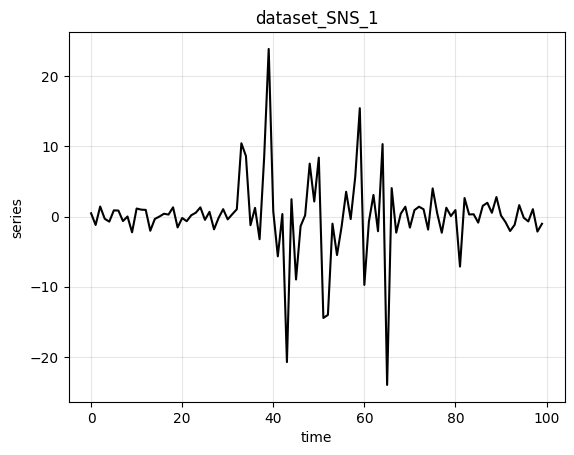

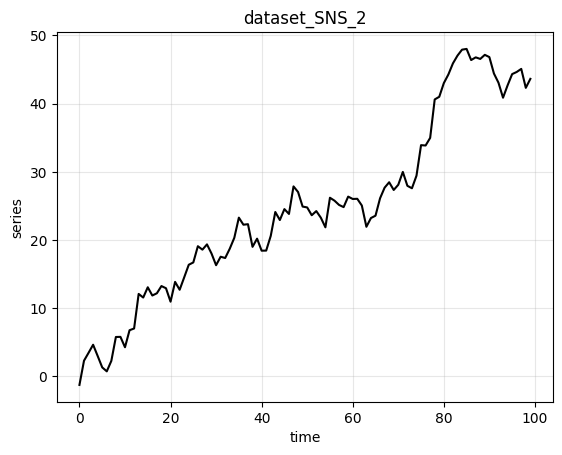

In [34]:
# run-sequence plots
run_sequence_plot(time, dataset_SNS_1,
                  title="dataset_SNS_1")
plt.show()
run_sequence_plot(time, dataset_SNS_2,
                  title="dataset_SNS_2")

**Explanation:** Both appear nonstationary (heteroscedasticity and trend/autocorrelation, respectively).

In [35]:
# chunked stats

# split data into 10 chunks
chunks1 = np.split(dataset_SNS_1, indices_or_sections=10)
chunks2 = np.split(dataset_SNS_2, indices_or_sections=10)

print("[chunk1]")
print("Mean: \n", np.mean(chunks1, axis=1))
print("Var: \n", np.var(chunks1, axis=1))
print()
print("[chunk2]")
print("Mean: \n", np.mean(chunks2, axis=1))
print("Var: \n", np.var(chunks2, axis=1))

[chunk1]
Mean: 
 [-0.14368349  0.121089    0.04714784  4.92083495 -2.32626967 -0.3706503
 -1.95084875  0.34634898  0.30483126 -0.51907842]
Var: 
 [ 1.1064868   1.16521661  0.76635153 59.91993023 55.94682032 79.168351
 77.81561226  3.18839451  7.29302955  1.34694601]

[chunk2]
Mean: 
 [ 2.8186155  10.51083038 16.02252814 19.73251898 23.26775272 24.60790371
 25.54323527 32.73577811 46.28942898 43.77348672]
Var: 
 [ 4.50258195  9.30343813  7.51911006  4.97894604  9.42707844  1.77171835
  3.96080036 22.71299455  2.22467478  2.47819651]


**Explanation:** dataset_SNS_1 clearly has three regions of differing variance while dataset_SNS_2 clearly has changing mean.

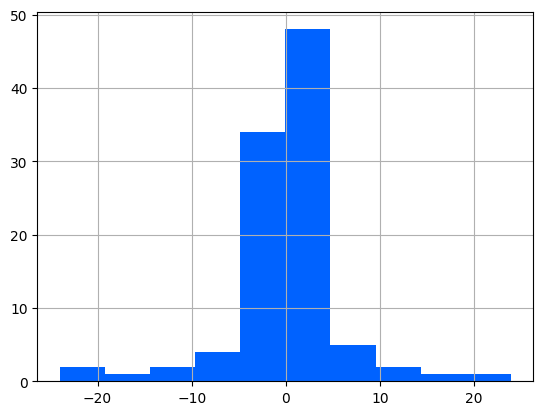

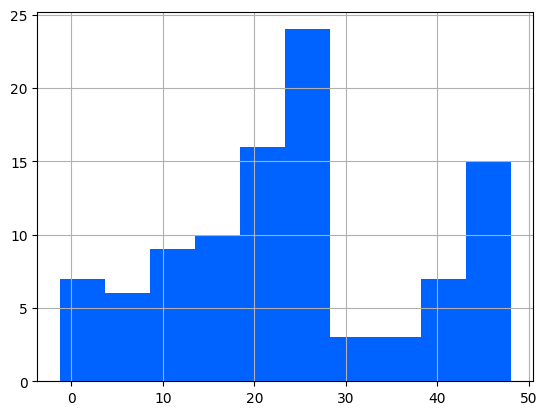

In [36]:
# histograms
pd.Series(dataset_SNS_1).hist()
plt.show()
pd.Series(dataset_SNS_2).hist();

**Explanation:** dataset_SNS_1 is somewhat Normal but spikey with long tails on both sides while dataset_SNS_2 is far from Normal.

In [37]:
# ADF tests
adf_1, pvalue_1, usedlag_, nobs_, critical_values_1, icbest_ = adfuller(dataset_SNS_1)
print("dataset_SNS_1")
print("ADF: ", adf_1)
print("p-value:", pvalue_1)
print("crit values: ", critical_values_1)

print()

adf_2, pvalue_2, usedlag_, nobs_, critical_values_2, icbest_ = adfuller(dataset_SNS_2)
print("dataset_SNS_1")
print("ADF: ", adf_2)
print("p-value:", pvalue_2)
print("crit values: ", critical_values_2)

dataset_SNS_1
ADF:  -3.0324159035016023
p-value: 0.031976064558615916
crit values:  {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}

dataset_SNS_1
ADF:  -1.3222642986946496
p-value: 0.6189258221979334
crit values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


**Explanation:** We've seen before how ADF has trouble identifying heteroscedastic data so we have to consider all tools when it comes to dataset_SNS_1. Here, ADF is telling us the series is stationary, but that's clearly not the case. On the flip side, ADF says dataset_SNS_2 is nonstationary, as we can tell from the run-sequence plot. 

Therefore, both datasets are nonstationary and require transformation.

---

---

# Section 3: Common Nonstationary-to-Stationary Transformations

In this lesson, we will showcase several common ways to transform nonstationary time series data to stationary time series data. 
>Please note that this is but a small subset of the total possible ways to transform nonstationary time series. However, these methods will provide a strong foundation upon which to build in the future.

### Example #1: Remove Trend & Seasonality with Statsmodels

Let's run the ADF test before transforming.

In [38]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(trend_seasonality)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)

ADF:  0.29403605928893245
p-value:  0.9770692037868641


Nonstationary as we expect. Time for a transformation.

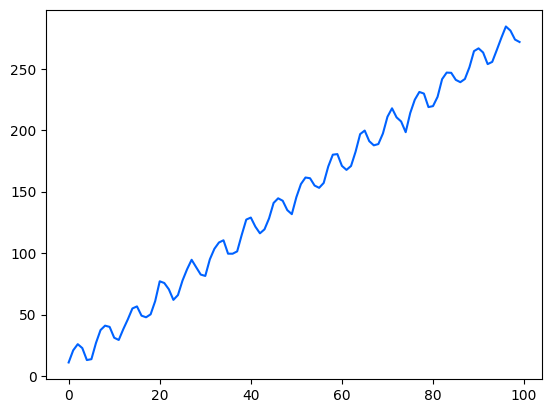

In [39]:
plt.plot(trend_seasonality)

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

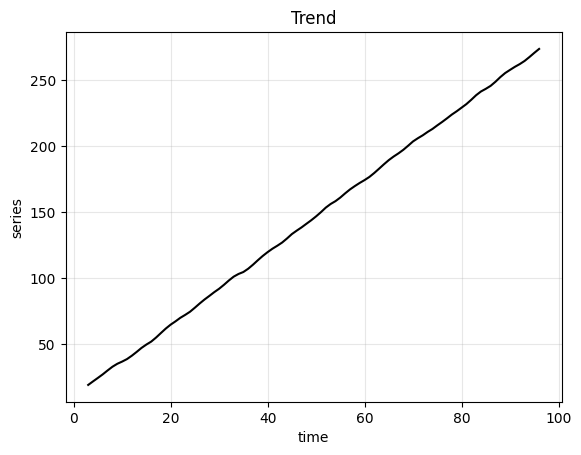

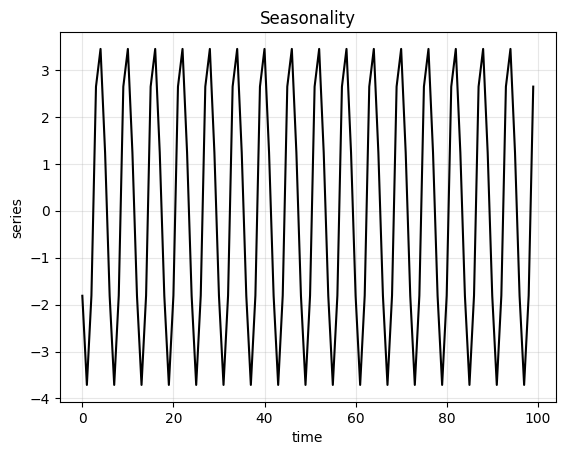

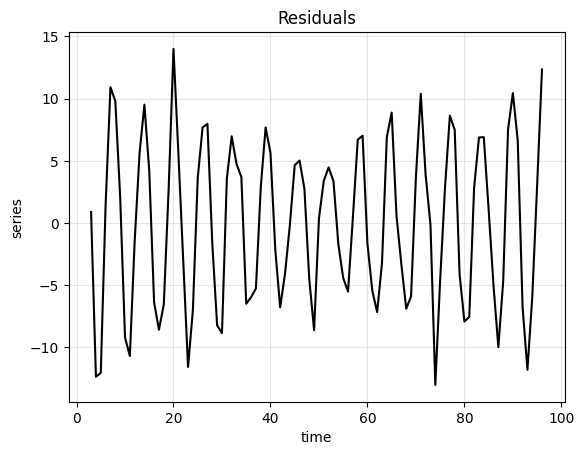

In [41]:
run_sequence_plot(time, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(time, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(time, est_residual, title="Residuals", ylabel="series")

Let's take a quick peek at the residual values.

In [42]:
print(est_residual)

[         nan          nan          nan   0.8840983  -12.35758556
 -12.04433461   1.48296718  10.92168902   9.79838903   2.1098592
  -9.18549316 -10.68530084  -1.39341901   5.62708429   9.51728139
   4.19733863  -6.37688101  -8.57079082  -6.54120712   2.73466783
  13.99559009   5.66172011  -2.96051089 -11.56383319  -6.98680664
   3.63407228   7.6896628    7.96829354  -1.62794659  -8.22074175
  -8.84730447   3.55066635   6.97315154   4.74605812   3.69790485
  -6.48278186  -5.95820585  -5.25809215   2.87435058   7.68322103
   5.64810713  -2.17356117  -6.77398565  -4.08149483  -0.16197687
   4.65431128   5.02346523   2.76727458  -4.5018214   -8.61021749
   0.383526     3.39920212   4.47636135   3.35785156  -1.70991311
  -4.41005501  -5.51047744   0.45522075   6.69811425   7.02150652
  -1.65724247  -5.43116384  -7.15141958  -3.23759496   6.91315694
   8.8780479    0.56710431  -3.33147621  -6.88311175  -5.88888625
   3.72543884  10.38963663   3.8706296   -0.1327287  -13.00749744
  -4.573024

We'll have to remove the first and last three values to run an ADF test since those values are all **nan**. Here's how to do that and run the test all in one call.

In [43]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -5.672045394689442
p-value:  8.876265981115178e-07


Now it's stationary!

### Example 2: Remove Changing Variance w/Log Transformation
This trick works well when you're dealing with heteroscedastic data. Let's plot that again to remind you what that looks like.

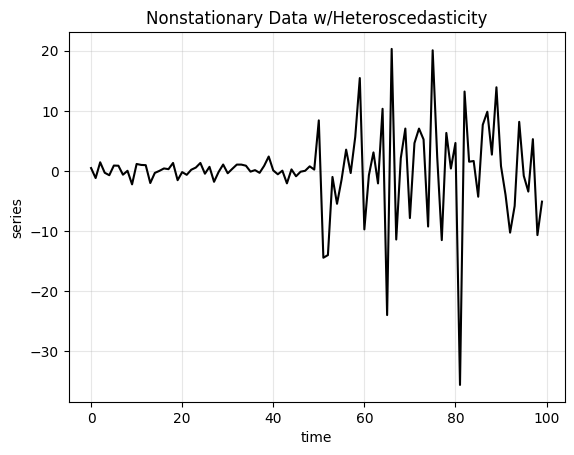

In [44]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

Notice how the plot shows two clearly different variance levels, one with small variance at the left and another with larger variance to the right?

Let's run the ADF test.

In [45]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(heteroscedasticity)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)
print("Critical Values: ", critical_values_)

ADF:  -5.462617806964473
p-value:  2.4990147402545993e-06
Critical Values:  {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}


Hmm, ADF is saying we reject the null that this series is nonstationary. However, the plot clearly shows that the variance is not constant with time. 

This is an important lesson: Plotting is a useful tool because some statistical tests like ADF have low power, meaning they either need lots and lots of data or they may incorrecly reject the null hypothesis when in fact the null is true. 

#### Log Transformation

We can apply a log transformation. However, we cannot take the log of nonpositive values. The way we can get around this is by adding a constant to all values to make them positive. 

Let's take a look. 

In [46]:
new_hetero = heteroscedasticity + 38

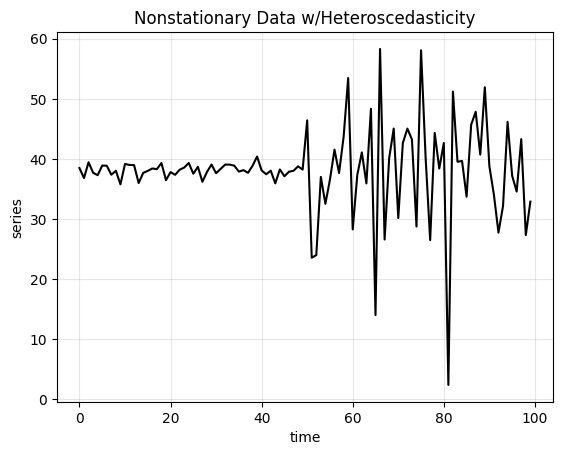

In [47]:
run_sequence_plot(time, new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

Now every value is positive and we can apply the log transformation.

In [48]:
log_new_hetero = np.log(new_hetero)

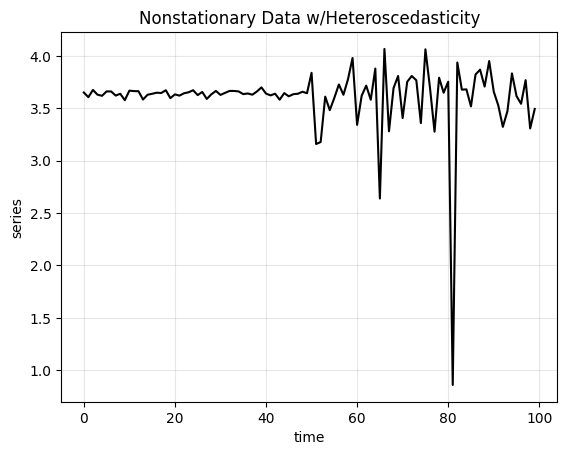

In [49]:
run_sequence_plot(time, log_new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

Notice how the variance has collapsed to a large extent. 

Let's view the ADF test statistics again.

In [50]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(log_new_hetero)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -11.988221715202044
p-value:  3.5714555887959506e-22


The big takeaway here is that the test confirms a greater confidence in the log transformed time series being stationary.

### Example 3: Removing Autocorrelation with Differencing
Remember the *lagged* data? Turns out we can transform this series into stationary by applying what's called a differece. It's a fancy term that simply means you're going to subtract a past value from a current value. An example will make this clear.

We know *lagged* was created with a lag of one. So let's subtract $O_{t-1}$ from $O_{t}$ where $O_{t}$ is the observed data at time *t* and $O_{t-1}$ is the observed data at *t-1*.

In [51]:
difference = lagged[:-1] - lagged[1:]

In [52]:
pd.DataFrame({'roiginal':lagged[:-1],'shift':lagged[1:]})

,roiginal,shift
0,-0.398427,-1.450040
1,-1.450040,-2.306826
2,-2.306826,-4.312520
3,-4.312520,-4.715734
4,-4.715734,-3.705607
...,...,...
94,12.290088,13.253382
95,13.253382,11.043738
96,11.043738,11.428051
97,11.428051,11.573573


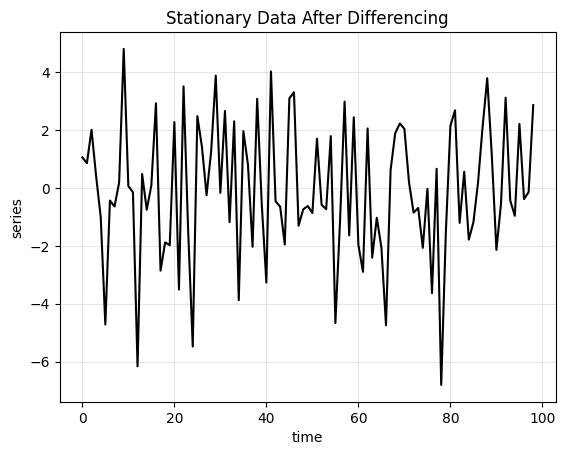

In [53]:
run_sequence_plot(time[:-1], difference,
                  title="Stationary Data After Differencing")

Let's run ADF one more time, this time on the differenced data.

In [54]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(difference)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -10.809982939729167
p-value:  1.9196947925176694e-19


It's stationary!

A key question that should be on the tip of your mind right now is how do you know if your data has autocorrelation and how do you decide what lag to use when differencing? Have no fear. We will discuss all the gory details in the the next lesson.

---

### Exercise #3
If either or both datasets from exercises one and two are nonstationary, apply the transformations you learned in this section to make them so. Then apply the methods you learned in Section 2 to ensure stationarity.

In [55]:
dataset_SNS_1_log = np.log( dataset_SNS_1 + 25 )

In [56]:
dataset_SNS_2_diff = dataset_SNS_2[:-1] - dataset_SNS_2[1:]

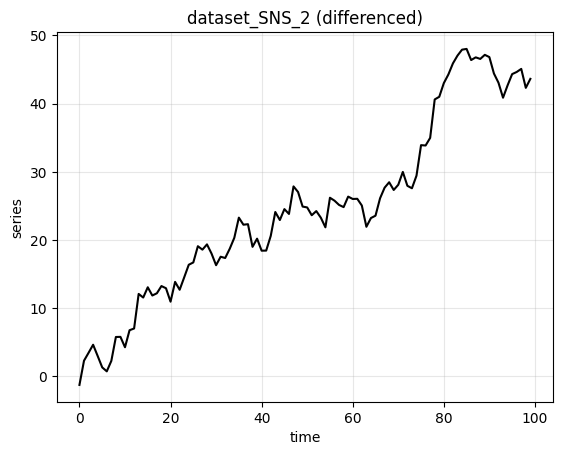

In [57]:
run_sequence_plot(time, dataset_SNS_2,
                  title="dataset_SNS_2 (differenced)")

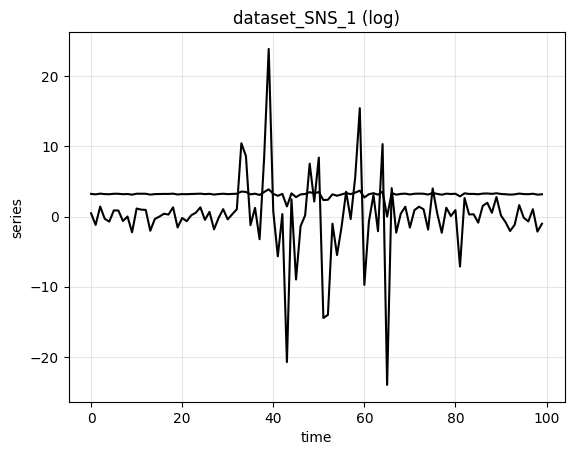

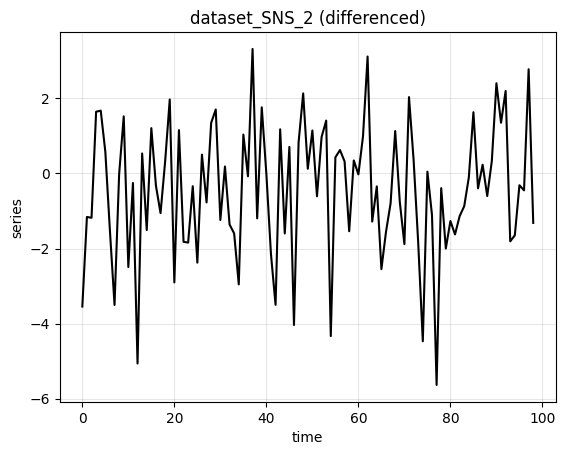

In [58]:
# run-sequence plots
run_sequence_plot(time, dataset_SNS_1,
                  title="orignal")
run_sequence_plot(time, dataset_SNS_1_log,
                  title="dataset_SNS_1 (log)")
plt.show()
run_sequence_plot(time[:-1], dataset_SNS_2_diff,
                  title="dataset_SNS_2 (differenced)")

In [59]:
# chunked stats

# split data into 10 chunks
chunks1_log = np.split(dataset_SNS_1_log, indices_or_sections=10)
chunks2_diff = np.split(dataset_SNS_2_diff, indices_or_sections=9)

print("[chunk1]")
print("Mean: \n", np.mean(chunks1_log, axis=1))
print("Var: \n", np.var(chunks1_log, axis=1))
print()
print("[chunk2]")
print("Mean: \n", np.mean(chunks2_diff, axis=1))
print("Var: \n", np.var(chunks2_diff, axis=1))

[chunk1]
Mean: 
 [3.2122048  3.22276024 3.22014064 3.36950829 3.01519423 3.12475748
 2.89444899 3.23016944 3.22427585 3.1967811 ]
Var: 
 [0.00182641 0.00191978 0.00124754 0.05440107 0.30781792 0.17757266
 0.97585652 0.00491835 0.01462046 0.00221582]

[chunk2]
Mean: 
 [-0.72869606 -0.53901512 -0.54678965 -0.38227396 -0.29692422  0.00731073
 -0.80460227 -1.052042    0.2654023 ]
Var: 
 [3.49814788 3.77394136 1.65346545 4.05400889 4.27486911 2.01011003
 2.74965891 2.99322188 2.53347512]


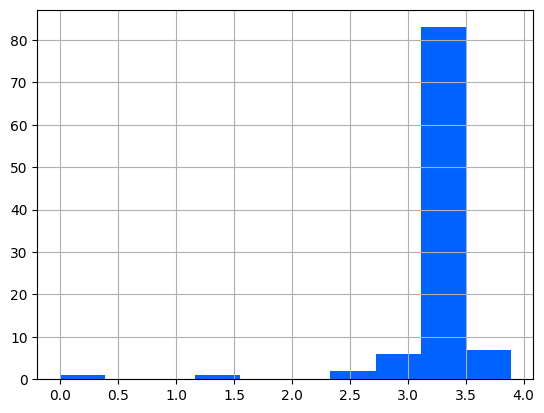

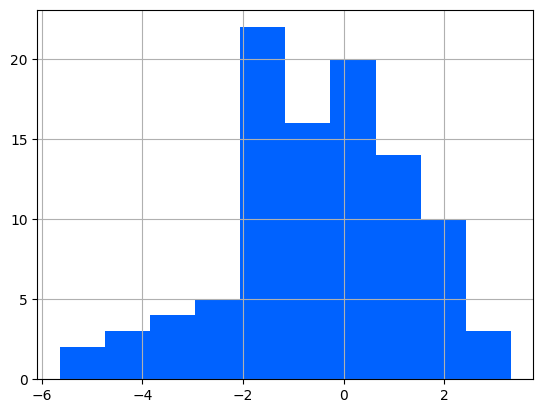

In [60]:
# histograms
pd.Series(dataset_SNS_1_log).hist()
plt.show()
pd.Series(dataset_SNS_2_diff).hist();

In [61]:
# ADF tests
adf_1, pvalue_1, usedlag_, nobs_, critical_values_1, icbest_ = adfuller(dataset_SNS_1_log)
print("dataset_SNS_1")
print("ADF: ", adf_1)
print("p-value:", pvalue_1)
print("crit values: ", critical_values_1)

print()

adf_2, pvalue_2, usedlag_, nobs_, critical_values_2, icbest_ = adfuller(dataset_SNS_2_diff)
print("dataset_SNS_1")
print("ADF: ", adf_2)
print("p-value:", pvalue_2)
print("crit values: ", critical_values_2)

dataset_SNS_1
ADF:  -10.750411172845046
p-value: 2.674288989362179e-19
crit values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}

dataset_SNS_1
ADF:  -10.280042396185916
p-value: 3.8006628429668026e-18
crit values:  {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}


Both are now stationary!

---

# Summary

In this exercise, we have covered: 
1. What it means for time series to be stationary.
2. Common ways to identify stationarity.
3. Useful nonstationary-to-stationary transformations.

---
### Machine Learning Foundation (C) 2020 IBM Corporation